# EDA for taxi trips in NY city

Importing data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
file = 'D:\\Users\\Desktop\\Data\\NY Taxi\\train.csv'
df = pd.read_csv(file)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Some analysis of the data

In [2]:
df.shape

(1458644, 11)

In [3]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [4]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
df.describe(include='O')

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id2875421,2016-03-04 08:07:34,2016-02-19 19:25:04,N
freq,1,5,5,1450599


# Cleaning Data

transforming categorical variables to numurical

In [8]:
# 0 for N and 1 for Y
from sklearn import preprocessing
num_store_and_fwd_flag = preprocessing.LabelEncoder().fit(['N','Y'])
df.iloc[:, 9] = num_store_and_fwd_flag.transform(df.iloc[:, 9])


In [9]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435


we can't have any date analysis with datetimes so we will deal with that

In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df['pickup_day'] = df['pickup_datetime'].dt.day_of_week
df['pickup_day_name'] = df['pickup_datetime'].dt.day_name()
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_month_name'] = df['pickup_datetime'].dt.month_name()
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_minute'] = df['pickup_datetime'].dt.minute
df['pickup_second'] = df['pickup_datetime'].dt.second

df['dropoff_day'] = df['dropoff_datetime'].dt.day_of_week
df['dropoff_day_name'] = df['dropoff_datetime'].dt.day_name()
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_month_name'] = df['dropoff_datetime'].dt.month_name()
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_minute'] = df['dropoff_datetime'].dt.minute
df['dropoff_second'] = df['dropoff_datetime'].dt.second


df.drop(['pickup_datetime','dropoff_datetime'], axis=1, inplace=True)

df.head()


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,...,pickup_hour,pickup_minute,pickup_second,dropoff_day,dropoff_day_name,dropoff_month,dropoff_month_name,dropoff_hour,dropoff_minute,dropoff_second
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,...,17,24,55,0,Monday,3,March,17,32,30
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,...,0,43,35,6,Sunday,6,June,0,54,38
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,...,11,35,24,1,Tuesday,1,January,12,10,48
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2,...,19,32,31,2,Wednesday,4,April,19,39,40
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,5,...,13,30,55,5,Saturday,3,March,13,38,10


we will have a better look on the data with plots

The trips in day per hour

In [11]:
trips_per_hour = df.groupby('pickup_hour',as_index=False)['id'].count().sort_values('id',ascending=False)
trips_per_hour.rename(columns={'id':'number of trips'},inplace=True)
trips_per_hour.head(10)

,pickup_hour,number of trips
18,18,90600
19,19,90308
21,21,84185
20,20,84072
22,22,80492
17,17,76483
14,14,74292
12,12,71873
15,15,71811
13,13,71473


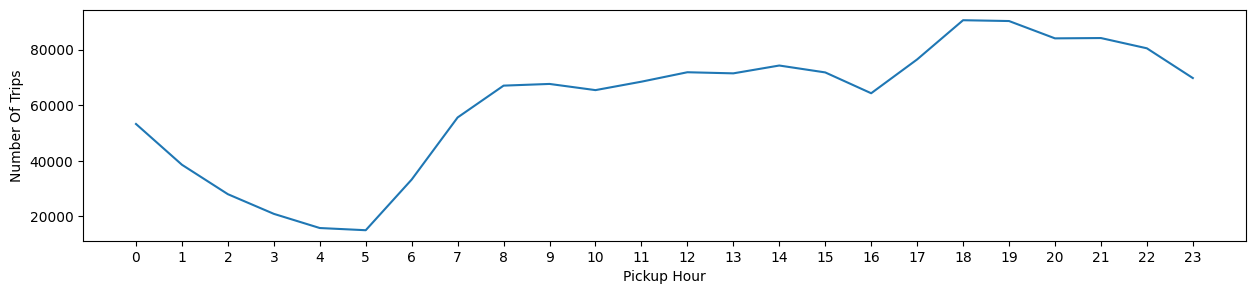

In [12]:
plt.figure(figsize=(15,3))
sns.lineplot(data=trips_per_hour,x='pickup_hour',y='number of trips')
plt.xticks(range(0,24))
plt.xlabel('Pickup Hour')
plt.ylabel('Number Of Trips')
plt.show()

The number of trips per days of week

In [13]:
x = df['dropoff_day_name'].value_counts()
x


dropoff_day_name
Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: count, dtype: int64

The most day with number ot trips is Friday with 223031 trip
The most day with number ot trips is Monday with 187433 trip


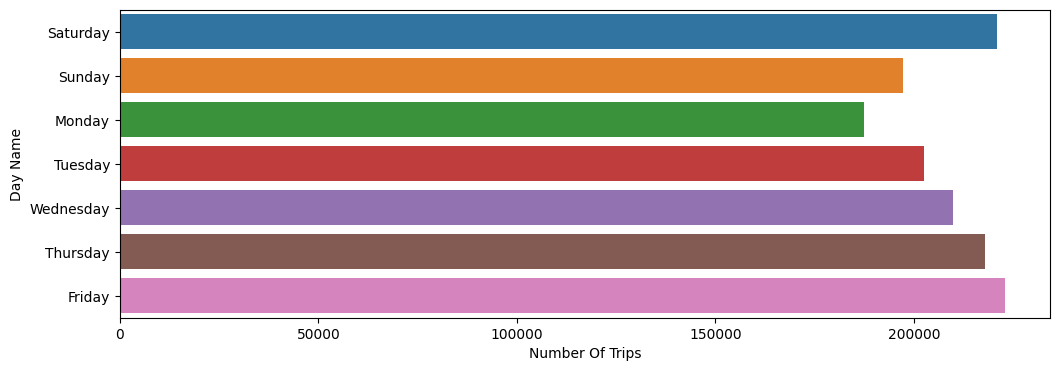

In [32]:
x = df['dropoff_day_name'].value_counts()
print('The most day with number ot trips is', x.index[0] , 'with' ,x.values[0],'trip' )
print('The most day with number ot trips is', x.index[6], 'with' ,x.values[6],'trip')
plt.figure(figsize=(12,4))
days = [i for i in range(7)]
sns.barplot(x=x.values.tolist(),y=x.index.to_list(),order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.xlabel('Number Of Trips')
plt.ylabel('Day Name')
plt.show()

The number of trips per month

In [26]:
x = df['dropoff_month_name'].value_counts()
x

dropoff_month_name
March       256135
April       251636
May         248555
February    238292
June        234243
January     229656
July           127
Name: count, dtype: int64

The most month with number ot trips is Friday with 223031 trip
The most month with number ot trips is Monday with 187433 trip


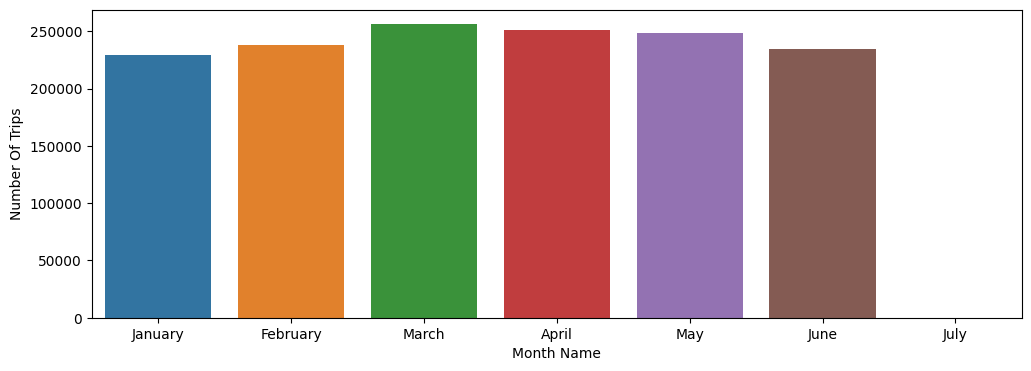

In [33]:
print('The most month with number ot trips is', x.index[0] , 'with' ,x.values[0],'trip' )
print('The most month with number ot trips is', x.index[6], 'with' ,x.values[6],'trip')
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='dropoff_month_name',order=['January','February','March','April','May','June','July'])
plt.xlabel('Month Name')
plt.ylabel('Number Of Trips')
plt.show()

The number of trips for each vendor

Number of trips for vendor 1 is 678342 trip
Number of trips for vendor 2 is 780302 trip


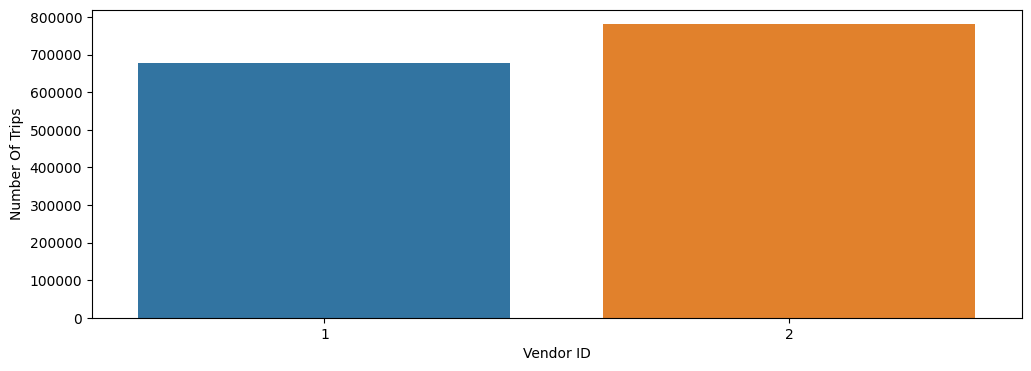

In [34]:
x = df['vendor_id'].value_counts()
print('Number of trips for vendor 1 is' ,x.values[1],'trip' )
print('Number of trips for vendor 2 is',x.values[0],'trip')
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='vendor_id')
plt.xlabel('Vendor ID')
plt.ylabel('Number Of Trips')
plt.show()

The number of trips for each number of passengers

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64


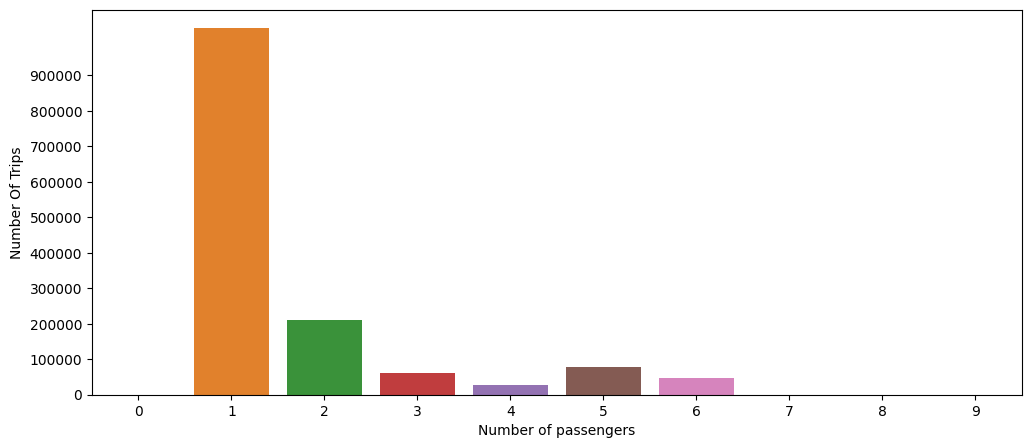

In [18]:
x = df['passenger_count'].value_counts()
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='passenger_count')
plt.xlabel('Number of passengers')
plt.ylabel('Number Of Trips')
plt.yticks(np.arange(0,1000000,step=100000))
print(x)
plt.show()

The percentage of trips per store and forward flags

flag 0 stands for N flag and flag 1 stands for Y flag


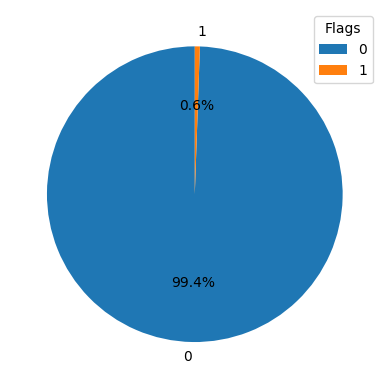

store_and_fwd_flag
0    1450599
1       8045
Name: count, dtype: int64


(None, None)

In [19]:
x = df['store_and_fwd_flag'].value_counts()
plt.figure()
plt.pie(x,labels=x.index.to_list(),autopct='%1.1f%%', startangle=90)
plt.legend(x.index, title='Flags', loc='upper right')
print('flag 0 stands for N flag and flag 1 stands for Y flag')
plt.show() , print(df['store_and_fwd_flag'].value_counts())



The next heat map shows the correlation between varaibles

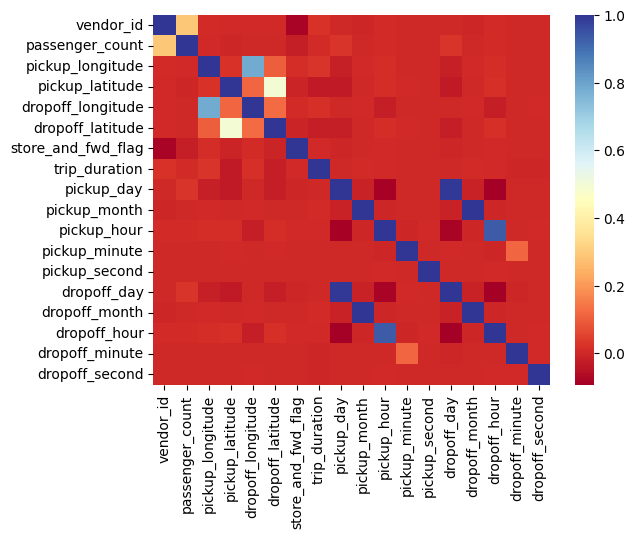

In [20]:
x = df.drop(columns=['id','pickup_day_name','pickup_month_name','dropoff_day_name','dropoff_month_name'])
plt.figure()
sns.heatmap(data=x.corr(),cmap='RdYlBu')
plt.show()

In the previous plot we see that there is no correlation between trip duration and any other variable in the table so we will calculate the distance with the cordinates we have 

we will use the haversine method to calaculate the distance for each trip

In [21]:
from math import radians, sin, cos, sqrt, atan2
def haversine_distance(row):
    lat1, lon1 = radians(row['pickup_latitude']), radians(row['pickup_longitude'])
    lat2, lon2 = radians(row['dropoff_latitude']), radians(row['dropoff_longitude'])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    radius_of_earth = 6371  # Earth's radius in kilometers
    distance = radius_of_earth * c

    return distance

df['distance'] = df.apply(haversine_distance, axis=1)
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,...,pickup_minute,pickup_second,dropoff_day,dropoff_day_name,dropoff_month,dropoff_month_name,dropoff_hour,dropoff_minute,dropoff_second,distance
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,...,24,55,0,Monday,3,March,17,32,30,1.498521
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,...,43,35,6,Sunday,6,June,0,54,38,1.805507
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,...,35,24,1,Tuesday,1,January,12,10,48,6.385098
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2,...,32,31,2,Wednesday,4,April,19,39,40,1.485498
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,5,...,30,55,5,Saturday,3,March,13,38,10,1.188588


In [22]:
df.dtypes

id                     object
vendor_id               int64
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
pickup_day              int32
pickup_day_name        object
pickup_month            int32
pickup_month_name      object
pickup_hour             int32
pickup_minute           int32
pickup_second           int32
dropoff_day             int32
dropoff_day_name       object
dropoff_month           int32
dropoff_month_name     object
dropoff_hour            int32
dropoff_minute          int32
dropoff_second          int32
distance              float64
dtype: object

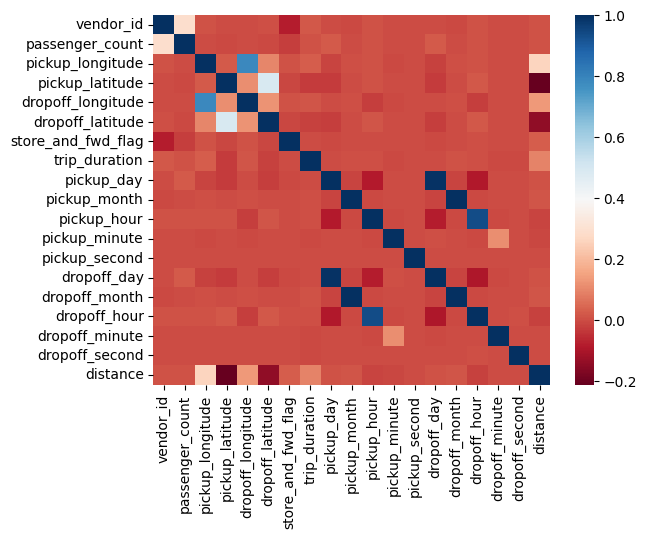

In [40]:
x = df.drop(columns=['id','pickup_day_name','pickup_month_name','dropoff_day_name','dropoff_month_name'])
plt.figure()
sns.heatmap(data=x.corr(),cmap='RdBu')
plt.show()

we see that there is a slight relation between trip duration and distance 

we can show the number of trips per hour for specific day 

In [49]:
friday_trips_per_hour = df.groupby(['pickup_hour','dropoff_day_name'],as_index=False)['id'].count().sort_values('id',ascending=False)
friday_trips_per_hour.rename(columns={'id':'number of trips'},inplace=True)
friday_trips_per_hour = friday_trips_per_hour[friday_trips_per_hour['dropoff_day_name'] == 'Friday']
friday_trips_per_hour.head(10)

,pickup_hour,dropoff_day_name,number of trips
133,19,Friday,14171
126,18,Friday,13404
154,22,Friday,13300
140,20,Friday,12835
161,23,Friday,12707
147,21,Friday,12579
56,8,Friday,11472
119,17,Friday,11024
98,14,Friday,10960
63,9,Friday,10547


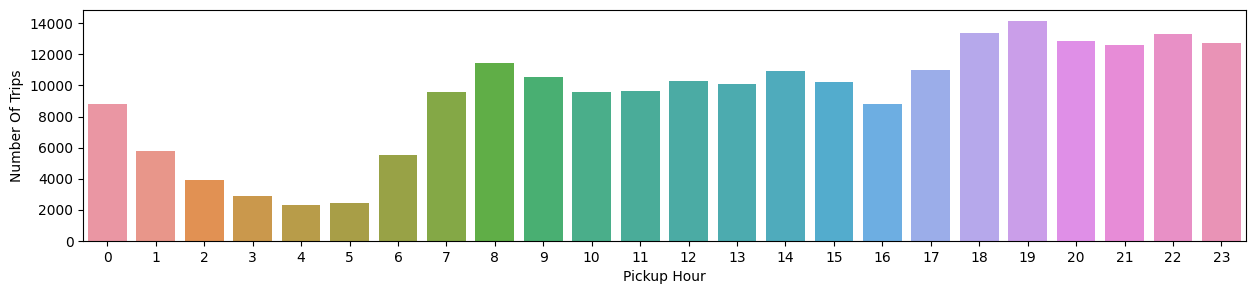

In [51]:
plt.figure(figsize=(15,3))
sns.barplot(data=friday_trips_per_hour,x='pickup_hour',y='number of trips')
plt.xticks(range(0,24))
plt.xlabel('Pickup Hour')
plt.ylabel('Number Of Trips')
plt.show()